In [1]:
# conventional way to import pandas
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib
from collections import OrderedDict
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.despine()

plt.rcdefaults()
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['axes.facecolor']='white'

## Load all datasets - CSA, LIG and PPI for conservation analysis

In [33]:
csa_df = pd.read_csv('../datasets/CS/CS_feature_table.csv')

csa_df=csa_df.drop_duplicates('residue_string')
csa_df['domain'], csa_df['domain_residue'] = csa_df['residue_string'].str.split('_', 1).str

redundant_domains=['1n2cF00', '1g64B00', '1xs1C00', '1c4tC00', '1ax4B02']
csa_df=csa_df[~csa_df['domain'].isin(redundant_domains)]


csa_df['LEGEND'] = "CS"

csa_df.loc[csa_df.annotation_MCSA == 0, 'SITE_LEGEND'] = "non-site"
csa_df.loc[csa_df.annotation_MCSA == 1, 'SITE_LEGEND'] = "site"

csa_df.loc[csa_df.annotation_MCSA == 0, 'Site'] = "non-CS"
csa_df.loc[csa_df.annotation_MCSA == 1, 'Site'] = "CS"

In [3]:
lig_df = pd.read_csv('../datasets/LIG/LIG_feature_table.csv')

lig_df=lig_df.drop_duplicates('residue_string')
lig_df['domain'], lig_df['domain_residue'] = lig_df['residue_string'].str.split('_', 1).str

lig_df['LEGEND'] = "LIG"
lig_df.loc[lig_df.annotation_BIOLIP == 0, 'SITE_LEGEND'] = "non-site"
lig_df.loc[lig_df.annotation_BIOLIP == 1, 'SITE_LEGEND'] = "site"

lig_df.loc[lig_df.annotation_BIOLIP == 0, 'Site'] = "non-LIG"
lig_df.loc[lig_df.annotation_BIOLIP == 1, 'Site'] = "LIG"

In [4]:
ppi_df = pd.read_csv('../datasets/PPI/PPI_feature_table.csv')

ppi_df['domain'], ppi_df['domain_residue'] = ppi_df['residue_string'].str.split('_', 1).str
ppi_df = ppi_df.drop_duplicates('residue_string')

ppi_df['LEGEND'] = "PPI"
ppi_df.loc[ppi_df.annotation_PROTINDB == 0, 'SITE_LEGEND'] = "non-site"
ppi_df.loc[ppi_df.annotation_PROTINDB == 1, 'SITE_LEGEND'] = "site"

ppi_df.loc[ppi_df.annotation_PROTINDB == 0, 'Site'] = "non-PPI"
ppi_df.loc[ppi_df.annotation_PROTINDB == 1, 'Site'] = "PPI"


In [5]:
csa_data = csa_df[(csa_df.annotation_MCSA == 1)]
csa_data.shape

(2325, 176)

In [6]:
biolip_data = lig_df[(lig_df.annotation_BIOLIP == 1)]
biolip_data.shape

(20031, 176)

In [7]:
ibis_data = ppi_df[(ppi_df.annotation_IBIS_PPI_INTERCHAIN == 1)| (ppi_df.annotation_IBIS_PPI_INTRACHAIN == 1)]
ibis_data.shape

(131838, 176)

In [8]:
ibis_interppi = ppi_df[(ppi_df.annotation_IBIS_PPI_INTERCHAIN == 1)]
ibis_interppi.shape

(80393, 176)

In [9]:
#csa_data['CSA_scorecons'] = csa_data['scons']
csa_data['LEGEND'] = "CS"
#biolip_data['LIG_scorecons'] = biolip_data['scons']
biolip_data['LEGEND'] = "LIG"
#did3_data['PPI_scorecons'] = did3_data['scons']
ibis_interppi['LEGEND'] = "PPI"

/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Combine all annotations for CSA, LIG, PPI residues in all datasets

In [10]:
frames = [csa_df, lig_df, ppi_df]
result = pd.concat(frames)
result.head(2)

,residue_string,A_pssm_ff,A_pssm_psiblast,A_wop_ff,A_wop_psiblast,C_pssm_ff,C_pssm_psiblast,C_wop_ff,C_wop_psiblast,D_pssm_ff,...,sc5_scons,scons,surface_residues_struc_neighbourhood,van_der_waals_vol_normalised,Unnamed: 170,domain,domain_residue,LEGEND,SITE_LEGEND,Site
0,1yonA02_168,-5.0,-3.0,0.0,0.0,-7.0,-5.0,0.0,0.0,5.0,...,4,0.538,6,2.95,NaN,1yonA02,168,CS,non-site,non-CS
1,1yonA02_169,-5.0,-4.0,0.0,0.0,-5.0,-4.0,0.0,0.0,-7.0,...,5,0.737,6,4.00,NaN,1yonA02,169,CS,non-site,non-CS


In [11]:
domain_list = result.domain.unique().tolist()

In [12]:
# find uniq domains for annotating surface_nonsite residues
nr_domains = []

# open file and read the content in a list
with open('domain_uniq_cath_assignments.txt', 'r') as filehandle:  
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        nr_domains.append(currentPlace)
        
len(nr_domains)

5048

In [13]:
nr_domain_data=result[result['domain'].isin(nr_domains)]
nr_domain_data.shape

(864906, 176)

#### Note: We use only IBIS PPI annotations to define True positives for PPI sites.
#### But for defining Non-surface sites - we remove any predicted ppi sites from IBIS, proteindb, 3DID as well

In [14]:
nonsite_nr_data = nr_domain_data[(nr_domain_data.annotation_IBIS_PPI_INTERCHAIN == 0) & (nr_domain_data.annotation_IBIS_PPI_INTRACHAIN == 0) & (nr_domain_data.annotation_3DID_INTERCHAIN == 0) & (nr_domain_data.annotation_3DID_INTRACHAIN == 0) & (nr_domain_data.annotation_BIOLIP == 0) & (nr_domain_data.annotation_MCSA == 0)]
nonsite_nr_data['LEGEND']= "buried_NS"
nonsite_nr_data.loc[nonsite_nr_data.rsa_allatoms >= 10, 'LEGEND'] = "surface_NS"
nonsite_nr_data['surface_residue_rsa'] = (nonsite_nr_data['rsa_allatoms'] >= 10).astype(int)
nonsite_nr_data.shape

/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sayonidas/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

(672588, 177)

In [15]:
nonsite_surface_nr_data = nonsite_nr_data[(nonsite_nr_data.surface_residue_rsa == 1)]
nonsite_surface_nr_data = nonsite_surface_nr_data.drop(['surface_residue_rsa'], axis =1)
nonsite_surface_nr_data.shape

(451435, 176)

In [16]:
frames1 = [csa_data, biolip_data, ibis_interppi, nonsite_nr_data] #nonsite_surface_nr_data
result1 = pd.concat(frames1)
result1 = result1.drop_duplicates(['residue_string'])
result1.head(2)

/Users/sayonidas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A_pssm_ff,A_pssm_psiblast,A_wop_ff,A_wop_psiblast,C_pssm_ff,C_pssm_psiblast,C_wop_ff,C_wop_psiblast,D_pssm_ff,D_pssm_psiblast,...,rsa_mainchain,rsa_nonpolar,rsa_polar,rsa_totside,sc5_gs,sc5_scons,scons,surface_residue_rsa,surface_residues_struc_neighbourhood,van_der_waals_vol_normalised
8,-6.0,-3.0,0.0,0.0,-8.0,-6.0,0.0,0.0,-6.0,-3.0,...,1.9,61.1,57.7,73.0,-1,7,0.998,NaN,7,4.77
131,-4.0,-4.0,0.0,0.0,-5.0,-5.0,0.0,0.0,-1.0,-1.0,...,0.0,2.8,11.6,11.9,2,9,1.000,NaN,3,2.95


In [17]:
print(csa_data.shape)
print(biolip_data.shape)
print(ibis_interppi.shape)
print(nonsite_nr_data.shape)

(2325, 176)
(20031, 176)
(80393, 176)
(672588, 177)


Text(0, 0.5, 'Funfam conservation score')

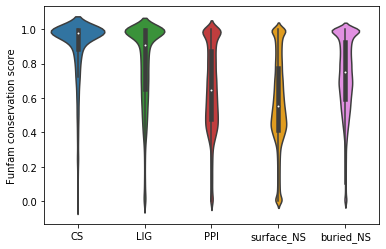

In [18]:
result2 = result1[['scons', 'LEGEND']]
result2=result2.reset_index()
result2 = result2.drop(['index'], axis =1)
result2.head(2)

sns.violinplot(x=result2.LEGEND, y=result2.scons, palette=["tab:blue", "tab:green", "tab:red", "orange", "violet"]);
plt.xlabel('')
plt.ylabel('Funfam conservation score')
#plt.savefig('violinplot_conservation_scores_functional_site_residues.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Density')

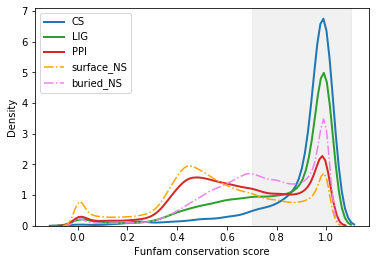

In [19]:
from scipy.stats import norm

sites = ['CS', 'LIG', 'PPI']
sites_ns = ['surface_NS', 'buried_NS']

colors = ["tab:blue", "tab:green", "tab:red",]
c=0

# Iterate through sites
for site in sites:
    # Subset to the site
    subset = result2[result2['LEGEND'] == site]
    
    # Draw the density plot
    sns.distplot(subset['scons'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color= colors[c],
                 label = site)
    c=c+1

# Iterate through sites_ns
colors_ns = ['orange', 'violet']
c=0
for site in sites_ns:
    # Subset to the site
    subset = result2[result2['LEGEND'] == site]
    
    # Draw the density plot
    sns.distplot(subset['scons'], hist = False, kde = True,
                 kde_kws={'linestyle':'-.','linewidth': 1.5}, color= colors_ns[c],
                 label = site)
    c=c+1
plt.axvspan(0.7, 1.1, alpha=0.3, color='lightgray')

# Plot formatting
plt.xlabel('Funfam conservation score')
plt.ylabel('Density')
#plt.savefig('KDE_conservation_scores_functional_site_residues.png', dpi=300, bbox_inches='tight')

In [32]:
result1[['domain',
 'domain_residue',
 'LEGEND', 
 'dops', 'scons',
 'annotation_MCSA',
 'annotation_BIOLIP',
 'annotation_BIOLIP_ligand',
 'annotation_IBIS_LIG',
 'annotation_IBIS_PPI_INTERCHAIN',
 'annotation_IBIS_PPI_INTRACHAIN',
 'annotation_3DID_INTERCHAIN',
 'annotation_3DID_INTRACHAIN',
 'annotation_PROTINDB',
 ]].to_csv('Dataset_for_functional_site_conservation.csv')

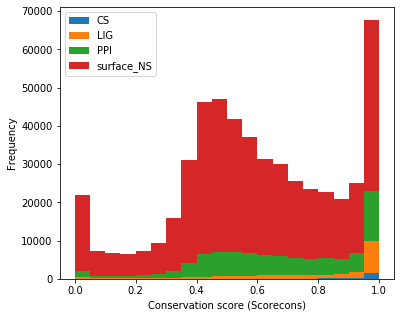

In [20]:
result3 = result2.pivot(columns='LEGEND', values='scons')
result3.head(2)

plt.rcParams['figure.figsize'] = (6.0, 5.0)
result3[["CS", "LIG", "PPI", "surface_NS"]].plot.hist(stacked=True, bins=20)
plt.xlabel('Conservation score (Scorecons)')
plt.legend()
#plt.savefig('stacked_hist_conservation_scores_functional_site_residues.png', dpi=300)